In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

num_samples = 50
np.random.seed(42)
x1 = np.random.rand(num_samples) * 10
x2 = np.random.rand(num_samples) * 5
x3 = np.random.rand(num_samples) * 3
y1 = 2 * x1 + 3 * x2 - 4 * x3 + np.random.normal(0, 1, num_samples)
y2 = -x1 + 4 * x2 + 2 * x3 + np.random.normal(0, 1, num_samples)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y1': y1, 'y2': y2})

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X_train = train_data[['x1', 'x2', 'x3']]
y_train = train_data[['y1', 'y2']]
X_test = test_data[['x1', 'x2', 'x3']]
y_test = test_data[['y1', 'y2']]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse_y1 = mean_squared_error(y_test['y1'], predictions[:, 0])
mse_y2 = mean_squared_error(y_test['y2'], predictions[:, 1])
print(f"Mean Squared Error (Y1): {mse_y1}")
print(f"Mean Squared Error (Y2): {mse_y2}")

predictions_df = pd.DataFrame(predictions, columns=['predicted_y1', 'predicted_y2'])
predictions_df.to_csv('MV_linear_regression.csv', index=False)


Mean Squared Error (Y1): 0.6177376695367824
Mean Squared Error (Y2): 2.4163568251074383


Mean Squared Error (Y1): 0.6177376695367824
Mean Squared Error (Y2): 2.4163568251074383


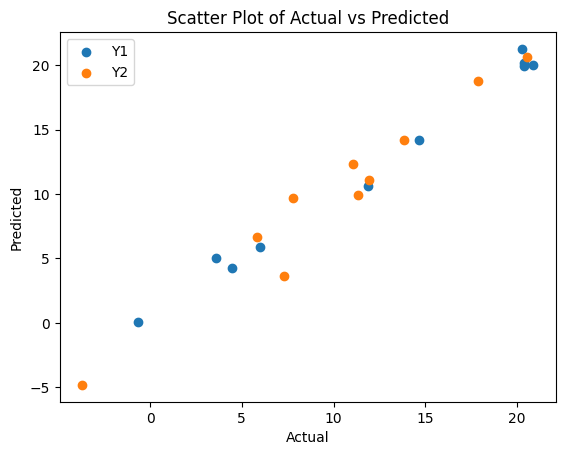

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create sample dataset
num_samples = 50
np.random.seed(42)
x1 = np.random.rand(num_samples) * 10
x2 = np.random.rand(num_samples) * 5
x3 = np.random.rand(num_samples) * 3
y1 = 2 * x1 + 3 * x2 - 4 * x3 + np.random.normal(0, 1, num_samples)
y2 = -x1 + 4 * x2 + 2 * x3 + np.random.normal(0, 1, num_samples)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y1': y1, 'y2': y2})

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate predictor variables and target variables
X_train = train_data[['x1', 'x2', 'x3']]
y_train = train_data[['y1', 'y2']]
X_test = test_data[['x1', 'x2', 'x3']]
y_test = test_data[['y1', 'y2']]

# Create and fit a multivariate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate mean squared errors for each target variable
mse_y1 = mean_squared_error(y_test['y1'], predictions[:, 0])
mse_y2 = mean_squared_error(y_test['y2'], predictions[:, 1])
print(f"Mean Squared Error (Y1): {mse_y1}")
print(f"Mean Squared Error (Y2): {mse_y2}")

# Save predictions to a CSV file
predictions_df = pd.DataFrame(predictions, columns=['predicted_y1', 'predicted_y2'])
predictions_df.to_csv('MV_linear_regression.csv', index=False)

# Plot scatter graphs for each target variable
plt.scatter(y_test['y1'], predictions[:, 0], label='Y1')
plt.scatter(y_test['y2'], predictions[:, 1], label='Y2')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Actual vs Predicted')
plt.legend()
plt.show()


AttributeError: 'tuple' object has no attribute 'size'

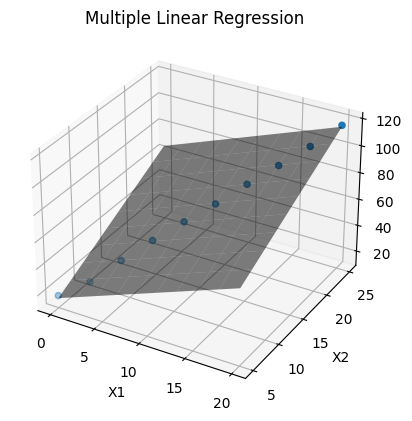

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

random.seed(40)
num_points = 10

x1 = np.linspace(0, 20, num_points)
x2 = np.linspace(5, 25, num_points)
y = 2 * x1 + 3 * x2 + 1 + np.random.normal(0, 1, num_points)

X = np.column_stack((x1, x2))

model = LinearRegression().fit(X, y)
predicted_y = model.predict(X)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 'predicted_y': predicted_y})
data.to_csv('linear_regression_data_multi_features.csv', index=False)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, label='Data')

x1_mesh, x2_mesh = np.meshgrid(x1, x2)
X_mesh = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
predicted_y_mesh = model.predict(X_mesh)
predicted_y_mesh = predicted_y_mesh.reshape(x1_mesh.shape)

ax.plot_surface(x1_mesh, x2_mesh, predicted_y_mesh, color='black', alpha=0.5, label='Regression')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression')
plt.legend()
plt.show()